In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def loadHousingData():
    tarballPath = Path("datasets/housing.tgz")
    if not tarballPath.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarballPath)
        with tarfile.open(tarballPath) as housing_tarball:
            housing_tarball.extractall(path='datasets')
    return pd.read_csv("datasets/housing/housing.csv")

housing = loadHousingData()


In [2]:
3

3

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


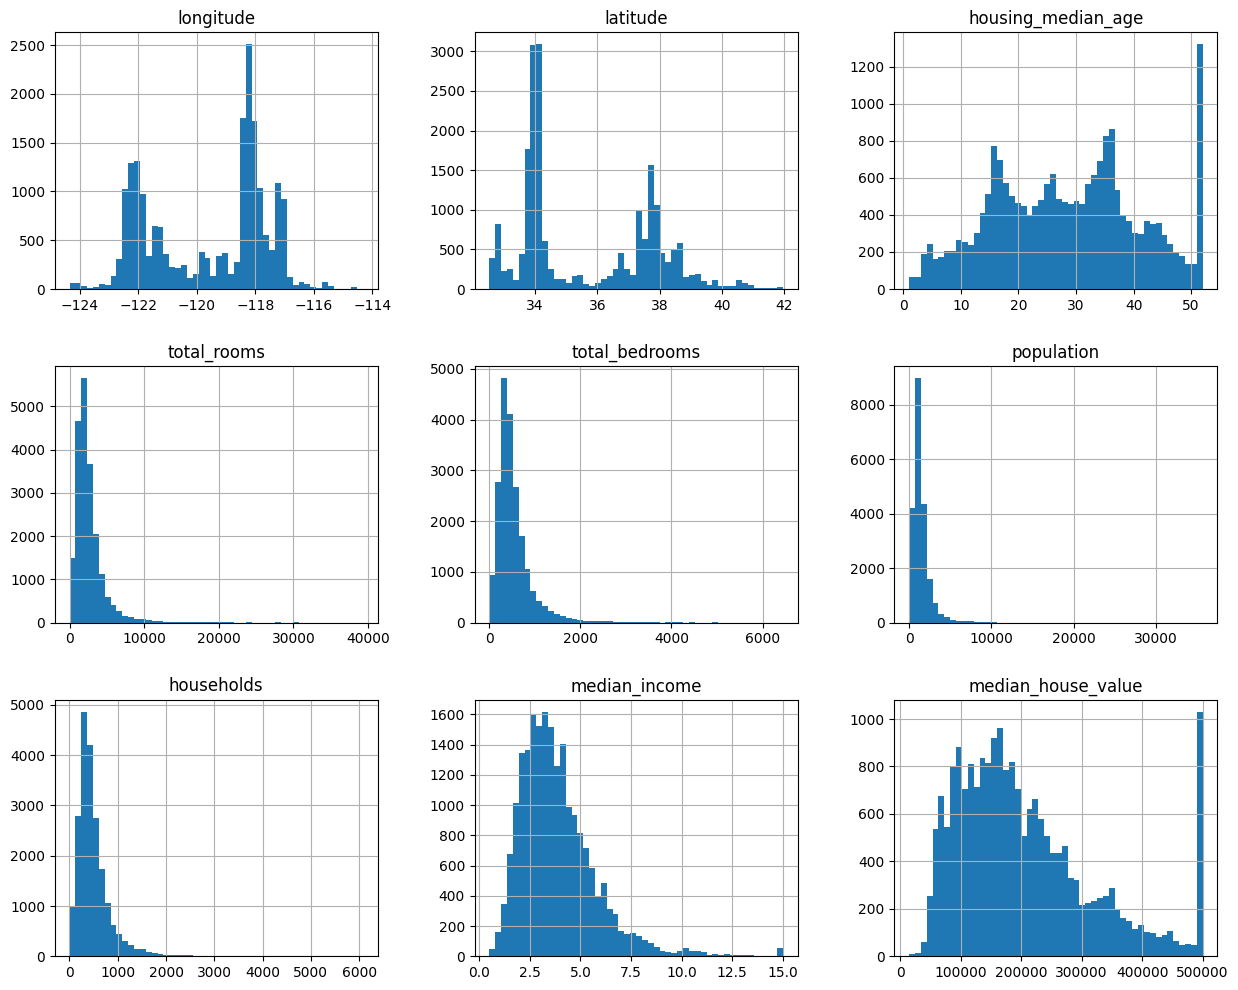

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(15,12))
plt.show()

(array([4., 1., 0., 1., 1., 1., 1., 1., 0., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

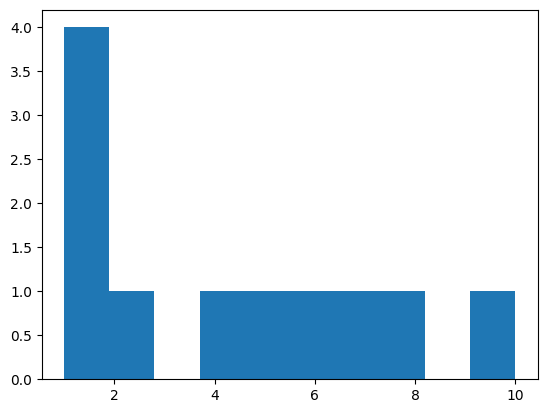

In [8]:
data = [1,2,1,4,5,6,7,8,1,10,1]

plt.hist(data, bins=10)

In [9]:
import numpy as np

def shuffleAndSplitData(data, testRatio):
    shuffledIndices = np.random.permutation(len(data))  
    testSetSize = int(len(data) * testRatio)
    testIndices = shuffledIndices[:testSetSize]
    trainIndices = shuffledIndices[testSetSize:]
    return data.iloc[trainIndices], data.iloc[testIndices]


In [10]:
trainSet, testSet = shuffleAndSplitData(housing, 0.2)

print(len(trainSet))

print(len(testSet))

if len(testSet) == 4128:
    print("Hello World!")

16512
4128
Hello World!


In [11]:
from zlib import crc32

def isIdInTestSet(indetifier, testRatio):
    return crc32(np.int64(indetifier)) < testRatio * 2 **32

def splitDataWithIdHash(data, testRatio, idColumn):
    ids = data[idColumn]
    inTestSet = ids.apply(lambda id_: isIdInTestSet(id_, testRatio))
    return data.loc[~inTestSet], data.loc[inTestSet]


In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(housing, test_size=0.2, random_state=42)

print(len(test_data))

4128


In [13]:
test_data["median_income"].sort_values()

14323     0.4999
1983      0.5360
11512     0.6433
18887     0.6991
1429      0.7714
          ...   
20304    15.0001
7826     15.0001
549      15.0001
10431    15.0001
2533     15.0001
Name: median_income, Length: 4128, dtype: float64

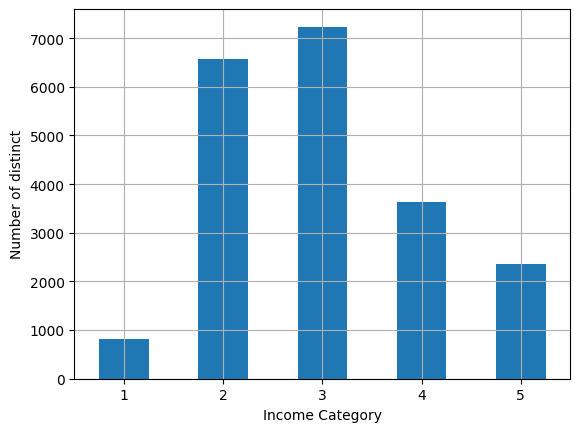

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)

plt.xlabel("Income Category")
plt.ylabel("Number of distinct")
plt.show()



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

spliter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

strat_split = []

for train_index, test_index in spliter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_split.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_split[0]

print(len(strat_train_set))

16512


In [ ]:
train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 13096    -122.42     37.80                52.0       3321.0          1115.0   
 14973    -118.38     34.14                40.0       1965.0           354.0   
 3785     -121.98     38.36                33.0       1083.0           217.0   
 14689    -117.11     33.75                17.0       4174.0           851.0   
 20507    -118.15     33.77                36.0       4366.0          1211.0   
 ...          ...       ...                 ...          ...             ...   
 14207    -118.40     33.86                41.0       2237.0           597.0   
 13105    -119.31     36.32                23.0       2945.0           592.0   
 19301    -117.06     32.59                13.0       3920.0           775.0   
 19121    -118.40     34.06                37.0       3781.0           873.0   
 19888    -122.41     37.66                44.0        431.0           195.0   
 
        population  households  median

In [17]:
print(strat_test_set["income_cat"].value_counts())

strat_test_set["income_cat"].value_counts()


print(strat_train_set["income_cat"].value_counts())

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64
income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64


In [18]:
housing = strat_train_set.copy()

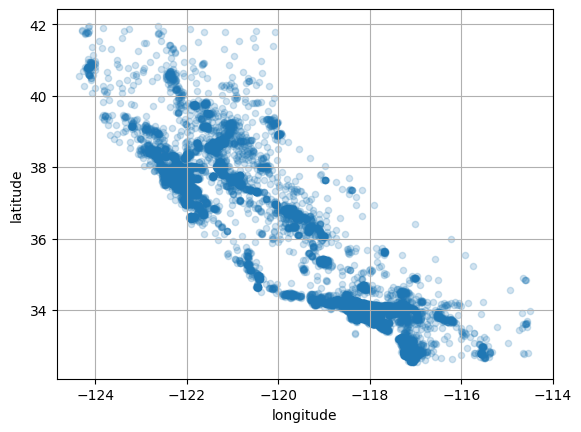

In [19]:
housing.plot(x="longitude", y="latitude", kind="scatter", grid=True, alpha=0.2)
plt.show()

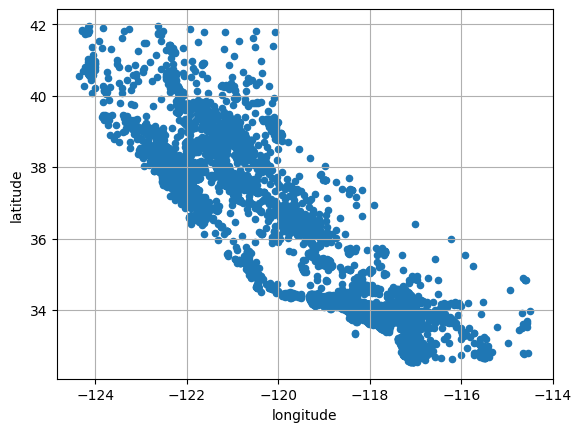

In [20]:
housing.plot(x="longitude", y="latitude", kind="scatter", grid=True)
plt.show()

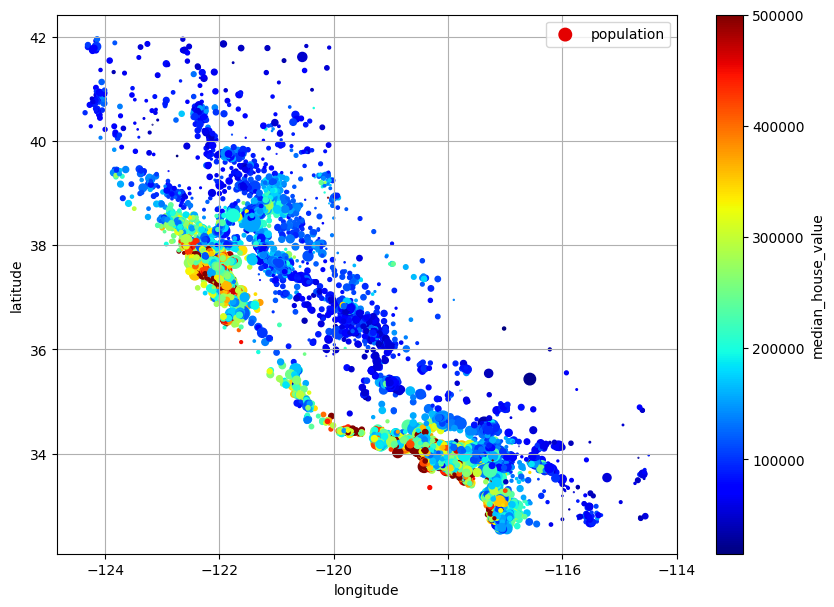

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [22]:
corr_matrix = housing.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [24]:
housing_cat = housing[["ocean_proximity"]]
print(len(housing_cat))
housing_cat.describe()

16512


,ocean_proximity
count,16512
unique,5
top,<1H OCEAN
freq,7274


In [25]:
from sklearn.preprocessing import OrdinalEncoder

ordinial_encoder = OrdinalEncoder()
housing_cat_encode = ordinial_encoder.fit_transform(housing_cat)



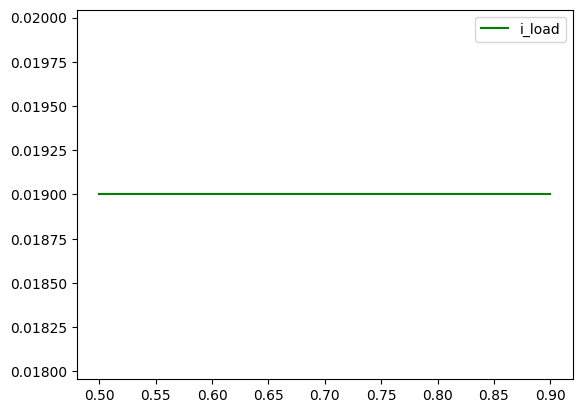

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.linspace(0.5, 0.9, 3)  # Rentang x (misalnya 0 hingga 10)
y = np.full(x.shape, 0.019)    # Garis horizontal dengan nilai 0.19

# Plot
plt.plot(x, y, label='i_load', color='green', linestyle='-')

# Tambahkan detail grafik
plt.legend()
plt.grid(False)

# Tampilkan plot
plt.show()


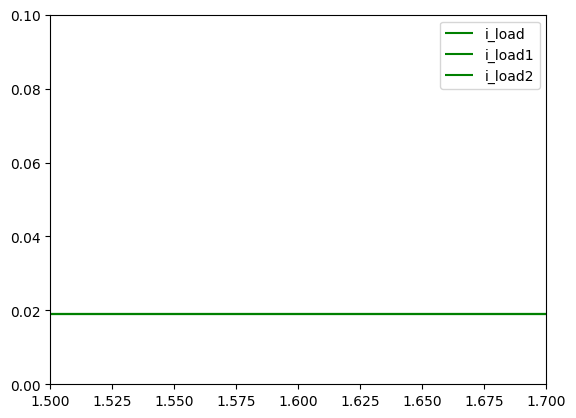

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
y = 0.019  # y = 0.019 untuk garis horizontal
x_min, x_max = 1.4, 10.8  # Rentang x (misalnya dari 0 hingga 1)

# Plot garis horizontal yang tembus
plt.hlines(y, x_min, x_max, color='green', linestyle='-', label='i_load')
plt.hlines(y, x_min, x_max, color='green', linestyle='-', label='i_load1')
plt.hlines(y, x_min, x_max, color='green', linestyle='-', label='i_load2')
plt.ylim(0,0.1)
plt.xlim(1.5, 1.7)
# Menambahkan detail grafik
plt.legend()
plt.grid(False)

# Tampilkan plot
plt.savefig("arus-123456")
plt.show()

plt.savefig("arus-123")


In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [29]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)



,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SMR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]



In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `loguniform()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

NameError: name 'svr_pipeline' is not defined